<a href="https://colab.research.google.com/github/datamino/PINNs-Research/blob/main/Research_Paper_Solving_differential_equations_with_Deep_Learning_a_beginner%E2%80%99s_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Solving differential equations with Deep Learning: a beginner’s guide**

---
---
# **Step # 1: Introduction**

---
---


## **🎯 a.Overview**
## **🔍 Big Picture of the Paper**  

This research paper is a **beginner-friendly guide to PINNs (Physics-Informed Neural Networks)**. It introduces the **concepts, methods, and applications** of PINNs for solving **differential equations**. The focus is on making it accessible for **students and researchers** who may not be experts in deep learning or physics.  

Here’s a **step-by-step breakdown** of what this paper is trying to teach:  

### **1️⃣ Why Do We Need PINNs?**
- Many scientific problems rely on **differential equations** (ODEs and PDEs).  
- Traditional methods (e.g., finite element methods) **struggle with complex problems** and require a lot of computational power.  
- Neural networks can **approximate any function**, making them powerful tools for solving differential equations.  
- **PINNs combine physics with deep learning** to solve differential equations **without needing labeled data**.

### **2️⃣ What Are PINNs?**
- PINNs are **standard neural networks** with a key difference:  
  - Instead of training on labeled data, they **embed differential equations** into the loss function.  
  - The loss function enforces **both the differential equation and boundary/initial conditions**.  
- This allows PINNs to find solutions to equations **without requiring explicit data points**.

### **3️⃣ How Do PINNs Work?**
- A neural network is used to **approximate the unknown function** (solution of the equation).  
- **Automatic differentiation (AD)** is used to compute derivatives inside the network.  
- The network minimizes a **loss function** that ensures:  
  1. The differential equation is satisfied at multiple points.  
  2. The boundary/initial conditions are met.  

### **4️⃣ What Problems Does This Paper Solve?**
- The paper demonstrates **three types of differential equations** solved using PINNs:
  1. **First-Order ODEs** (Exponential Decay)  
  2. **Second-Order ODEs** (Harmonic Oscillator)  
  3. **Second-Order Nonlinear ODEs** (Solitons in the KdV Equation)  
- For each case, the paper shows:  
  - The **mathematical formulation** of the equation.  
  - How to implement it using PINNs.  
  - How well PINNs approximate the exact solution.  

### **5️⃣ Key Takeaways**
- PINNs **remove the need for mesh-based numerical methods** (like finite element methods).  
- They provide a **flexible and efficient way to solve differential equations**.  
- PINNs work well for problems in **fluids, quantum mechanics, and photonics**.  
- The authors provide **Python code** so students can experiment with PINNs easily.

---

## **📄 Summary of the Paper**  

- **Title:** *Solving Differential Equations with Deep Learning: A Beginner’s Guide*  
- **Authors:** Luis Medrano Navarro, Luis Martin Moreno, Sergio G. Rodrigo  
- **Affiliation:** Universidad de Zaragoza, Spain  
- **Main Goal:** Introduce **PINNs in a simple way** for physics and engineering students.  
- **Key Sections:**  
  1. **Introduction** – Importance of AI in scientific computing.  
  2. **Basics of Neural Networks** – How NNs work, including activation functions, loss functions, and backpropagation.  
  3. **PINNs Explanation** – How they incorporate physics into neural networks.  
  4. **Solving ODEs with PINNs** – Example implementations for different equations.  
  5. **Comparison with Classical Methods** – PINNs vs. traditional solvers.  
  6. **Conclusion** – How PINNs can revolutionize physics education.  

---


---
---
# **Step # 2: Deep Reading (Line-by-Line Understanding)**
---
---

# **🎯 1.Introduction**


## **📌 a. Introduction**  

### **🔹 Overview of AI in Solving Differential Equations**  
Artificial Intelligence (AI) has transformed many scientific and engineering fields, including **solving differential equations**, which are essential in modeling physical systems.  

- Differential equations are widely used in **physics, engineering, and applied mathematics** to describe **heat transfer, fluid dynamics, quantum mechanics, and many other natural processes**.  
- Traditionally, solving these equations required **numerical methods** like **Finite Element Methods (FEM), Finite Difference Methods (FDM), and Spectral Methods**.  
- However, **these methods have limitations**, such as **high computational cost, sensitivity to meshing, and difficulties in handling complex geometries**.  

To overcome these limitations, researchers explored **Neural Networks (NNs) as function approximators** to solve differential equations **without requiring traditional numerical solvers**.  

---

## **🔹 Early Approaches: Trial Function Method (1999 Approach)**  
Before modern Physics-Informed Neural Networks (PINNs), early AI-based methods in the **1990s** attempted to solve differential equations using **trial functions**.  

### **What is a Trial Function?**  
A **trial function** is a function that is **constructed to automatically satisfy the boundary conditions** of a differential equation. Instead of directly training a neural network to predict $( y(x))$, researchers designed a function of the form:

$$
y_{\text{trial}}(x) = A(x) + B(x) N(x, W)
$$

where:
- $( A(x))$ **strictly satisfies the boundary conditions**.  
- $( B(x) )$ ensures that the **neural network output does not interfere with boundary conditions**.  
- $( N(x, W)$) is a **neural network with trainable weights \( W \)** that learns the unknown part of the solution.  

#### **How Did It Work? (Step-by-Step Example)**
Let’s consider solving the **ODE**:

$$
y'(x) + y(x) = 0, \quad y(0) = 1
$$

1. **Choosing a function that satisfies the boundary condition**  
   - A simple choice: $( A(x) = 1)$ because it satisfies $( A(0) = 1 )$.  
2. **Choosing a function $( B(x) )$ that vanishes at the boundary**  
   - A good choice is $( B(x) = x )$, because $( B(0) = 0 )$, ensuring the NN won’t interfere with boundary conditions.  
3. **Defining the trial function**  
   $$
   y_{\text{trial}}(x) = 1 + x N(x, W)
   $$
   - Here, $( N(x, W))$ is a neural network that learns the unknown part of the solution.  

The **neural network was trained** to satisfy the differential equation, ensuring that the final solution met both the **ODE and the boundary conditions**.

#### **Limitations of the Trial Function Approach**  
❌ **Manual selection of $( A(x))$ and $( B(x))$** makes it difficult to generalize to complex equations.  
❌ **Not suitable for partial differential equations (PDEs)**.  
❌ **Difficult to apply to high-dimensional problems**.  
❌ **Does not generalize well to different types of differential equations**.  

Because of these limitations, researchers moved toward **more flexible, neural-network-based methods**, leading to the development of modern **Neural Operator Networks**.

---

## **🔹 Modern Approaches: Fourier Neural Operator Networks (FNOs) & DeepONet**  
Since trial functions were **too restrictive**, researchers developed **Fourier Neural Operator Networks (FNOs) and Deep Operator Networks (DeepONet)**, which generalize neural networks to **learn entire function mappings instead of just solving equations at discrete points**.

### **1️⃣ Fourier Neural Operator Networks (FNOs)**  
**Fourier Neural Operator Networks (FNOs)** leverage **Fourier Transforms** to efficiently solve differential equations by capturing **global dependencies** instead of just local information.

#### **How FNOs Work (Step-by-Step)**
1. **Convert the Input Function into Fourier Space**  
   - Use the **Fast Fourier Transform (FFT)** to transform the function into frequency space.  
2. **Apply a Neural Network in Fourier Space**  
   - The network learns relationships between different frequencies in the problem.  
3. **Convert Back to Original Space**  
   - Use the **Inverse Fourier Transform (IFFT)** to return to physical space.  

#### **Why FNOs Are Powerful**  
✅ **Faster than traditional PDE solvers**.  
✅ **Captures long-range dependencies** (important for physics problems).  
✅ **Generalizes across different resolutions** (unlike CNNs).  

---

### **2️⃣ Deep Operator Networks (DeepONet)**
**DeepONet** extends neural networks to learn **operators**, meaning it maps **entire functions to other functions**.

#### **How Does DeepONet Work?**
- It consists of **two networks**:  
  1. **Branch Network** – Encodes the input function $( f(x))$.  
  2. **Trunk Network** – Processes specific query points to predict $( G(f)(x))$.  
- The final prediction is a **weighted sum** of the outputs of both networks.

#### **Why DeepONet is Powerful?**  
✅ **Learns function-to-function mappings** (not just point-wise approximations).  
✅ **Generalizes well across different PDEs and scientific problems**.  
✅ **Reduces the need for labeled data** by learning the structure of the solution.  

---

## **🔹 Physics-Informed Neural Networks (PINNs) – A New Paradigm**  
To **fully integrate physics into deep learning**, researchers introduced **Physics-Informed Neural Networks (PINNs)**.

### **What Are PINNs?**  
PINNs use **deep learning to solve differential equations** by embedding physics laws **directly into the loss function**.

Instead of learning from **labeled data**, PINNs learn solutions by **minimizing the residual of the differential equation**.  

$$
L(\theta) = \omega_D L_D(\theta) + \omega_B L_B(\theta)
$$

where:
- $( L_D(\theta))$ ensures the **differential equation is satisfied**.  
- $( L_B(\theta))$ ensures **boundary/initial conditions are met**.  
- $( \omega_D)$ and $( \omega_B)$ balance the two losses.  

### **Why Are PINNs Useful?**  
✅ **Do not require labeled data**—they learn directly from equations.  
✅ **Can solve both ODEs and PDEs**.  
✅ **Work in high-dimensional spaces**, unlike traditional solvers.  
✅ **Used in physics, fluid dynamics, quantum mechanics, and more**.  

---

## **📌 Final Summary (Introduction Section Overview)**  
1️⃣ **Early Approaches (Trial Functions - 1999)**  
   - Used predefined **trial functions** to ensure boundary conditions.  
   - **Limitations**: Not generalizable, hard to apply to PDEs.  

2️⃣ **Modern Methods (Neural Operators)**
   - **Fourier Neural Operator Networks (FNOs)** – Uses **Fourier Transforms** to capture **global dependencies** in PDEs.  
   - **DeepONet** – Uses a **two-branch network** to learn **function-to-function mappings**.  

3️⃣ **PINNs (Physics-Informed Neural Networks)**
   - **Combine physics and deep learning** by embedding differential equations into the **loss function**.  
   - **Solve ODEs/PDEs without labeled data**.  

### **Key Takeaways**  
✅ **Traditional numerical methods struggle with complex differential equations.**  
✅ **Trial functions were an early approach but had major limitations.**  
✅ **Modern methods (FNOs & DeepONet) allow neural networks to learn operators.**  
✅ **PINNs solve differential equations without requiring labeled datasets.**  

---



## **📌 b. More Explaination**


### **1. What Was the 1999 Approach? (Trial Function)**  

- In 1999, researchers like **Lagaris et al.** proposed an early way to solve differential equations using **Artificial Neural Networks (ANNs)**.  
- Their idea was to **define a trial function** that **automatically satisfies boundary conditions** and then train the network to satisfy the differential equation.  

---

### **📌 What Is a Trial Function?**  
A **trial function** is a function that is **constructed in a way that it already satisfies the boundary conditions** of the differential equation.  

Let’s say we want to solve this **ordinary differential equation (ODE)**:  
$$
y'(x) + y(x) = 0, \quad \text{with boundary condition} \quad y(0) = 1$$
Instead of directly training a neural network to predict $( y(x))$, the 1999 approach used a function like this:  

$$
y_{\text{trial}}(x) = A(x) + B(x) N(x, W)
$$

where:  
- $( A(x))$ is a function that **strictly satisfies the boundary condition**.  
- $( B(x))$ is a function that **ensures the neural network output does not interfere with boundary conditions**.  
- $( N(x, W))$ is the **output of a neural network** with trainable weights $( W)$, used to approximate the unknown part of the solution.  

---

### **📌 Why Did They Use a Trial Function?**  
The biggest problem when training a neural network to solve differential equations is ensuring that the **solution satisfies boundary conditions**.  
- If the NN is trained directly, it may not naturally satisfy the boundary conditions.  
- Instead, **by embedding boundary conditions into the trial function**, they **forced** the solution to always respect the boundary conditions.  
- The only thing left for the NN to learn was the **differential equation itself**.

---

### **📌 Example of a Trial Function (Step-by-Step)**  
Let’s take a simple ODE with boundary conditions:  
$
y'(x) + y(x) = 0, \quad y(0) = 1
$
1. **Step 1: Choose a function that satisfies the boundary condition**  
   - A simple choice: $( A(x) = 1)$ because it satisfies $( A(0) = 1)$.  

2. **Step 2: Choose a function $( B(x))$ that vanishes at the boundary**  
   - A good choice is $( B(x) = x)$, because $( B(0) = 0)$, ensuring that the NN won’t interfere with the boundary condition.  

3. **Step 3: Define the trial function**  
   $$
   y_{\text{trial}}(x) = A(x) + B(x) N(x, W) = 1 + x N(x, W)
   $$
   - Here, $( N(x, W))$ is a **neural network with trainable weights $( W) $**.  

4. **Step 4: Train the Neural Network**  
   - Instead of training the NN to directly predict $( y(x))$, it learns $( N(x, W)) $.  
   - The network is optimized so that $( y_{\text{trial}}(x))$ **satisfies the differential equation**.  

---

### **📌 Why Was This Approach Limited?**
1. **Choosing $( A(x))$ and $( B(x))$ requires manual effort** → Different problems require different trial functions.  
2. **Works only for simple boundary conditions** → For complex problems (like PDEs), defining a good trial function is difficult.  
3. **Generalization is weak** → The network does not learn a **pure function approximation**, but rather a constrained version of it.  

Because of these issues, researchers later **removed the need for a trial function** and instead incorporated the differential equation into the **loss function**, leading to **modern PINNs**.

---

### **🔹 Summary of the 1999 Approach:**
✅ **Used a "trial function" to ensure boundary conditions were always satisfied.**  
✅ **Neural network learned only the unknown part of the solution.**  
✅ **Required manually choosing \( A(x) \) and \( B(x) \), making it limited.**  
✅ **Modern PINNs no longer use trial functions and instead enforce equations through the loss function.**  


### **2. Fourier Neural Operator Networks (FNO)**  


## **1️⃣ What is the Fourier Series?**  
The **Fourier Series** is a mathematical method that allows us to represent **any periodic function** as an **infinite sum of sines and cosines**.  

### **🔹 Why Do We Need Fourier Series?**  
Some functions (like square waves, repeating patterns, or real-world signals) **cannot be easily written as polynomials or other simple functions**. Instead, we can express them as an infinite sum of **sinusoidal functions (sines & cosines)**.  

### **🔹 Fourier Series Formula**  
For a function $f(x)$ that is periodic over $[-L, L]$, its Fourier Series representation is:  

$$  
f(x) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos \frac{n\pi x}{L} + b_n \sin \frac{n\pi x}{L} \right)  
$$  

where:  
- $a_0$ = Constant term (DC component).  
- $a_n$ and $b_n$ are **Fourier coefficients** that determine how much of each sine/cosine wave is needed.  
- $\cos$ and $\sin$ terms represent different **frequencies** in the function.  

### **🔹 Example: Approximating a Square Wave**  
A **square wave** is a function that alternates between $+1$ and $-1$. A square wave is **not smooth**, but we can approximate it using **only sines**:  

$$  
f(x) = \frac{4}{\pi} \sum_{n=1,3,5,\dots}^{\infty} \frac{1}{n} \sin \left( n x \right)  
$$  

The more terms we add, the closer we get to the actual **square wave**.  

👉 **Key Idea:** The Fourier Series helps us express **complex functions as a combination of simple waveforms** (sines & cosines).  

---

## **2️⃣ What is a Fourier Neural Operator (FNO)?**  
Now that we understand Fourier Series, let’s see how it applies to **Fourier Neural Operator Networks (FNOs)**.  

### **🔹 Why Was FNO Introduced?**  
- Traditional neural networks struggle with **solving partial differential equations (PDEs)** because they rely on **local information** (point-wise data).  
- PDEs describe **global relationships**, meaning that information at one point influences the entire domain.  
- **FNOs use the Fourier Transform to capture global relationships efficiently**.  

### **🔹 What is a Neural Operator?**  
Before FNOs, researchers developed **Neural Operators**, which generalize neural networks to learn **functions instead of just mappings between inputs and outputs**.  

**Traditional NN:**  
$$  
f: x \to y  
$$  
(Takes input $x$, outputs $y$).  

**Neural Operator:**  
$$  
\mathcal{F}: f(x) \to g(x)  
$$  
(Takes an entire function $f(x)$ as input, outputs another function $g(x)$).  

This means **instead of just learning data points, Neural Operators learn continuous functions**.  

---

## **3️⃣ How Do Fourier Neural Operator Networks (FNOs) Work?**  
FNOs solve PDEs by using the **Fourier Transform** inside the neural network.  

### **🔹 Step-by-Step Process of FNO**  
1. **Transform Input into Fourier Space**  
   - Instead of working with data directly, FNO applies the **Fast Fourier Transform (FFT)** to convert input into the frequency domain.  
2. **Apply a Neural Network in Fourier Space**  
   - In the frequency domain, FNO learns how different frequencies interact.  
3. **Transform Back to Original Space**  
   - Uses the **Inverse Fourier Transform (IFFT)** to get the final output.  

### **🔹 Key Formula Behind FNO**  
Let’s say we want to solve a PDE where we predict a function $u(x)$ given input $f(x)$.  
FNO learns an operator **$\mathcal{F}$** such that:  

$$  
\mathcal{F}(f(x)) = u(x)  
$$  

It does this using Fourier transforms:  

$$  
\mathcal{F} = W_1 + \mathcal{F}^{-1} \sigma ( W_2 \mathcal{F} f )  
$$  

where:  
- $\mathcal{F}$ is the **Fourier Transform**.  
- $W_1, W_2$ are **trainable weights** in Fourier space.  
- $\mathcal{F}^{-1}$ is the **Inverse Fourier Transform**.  
- $\sigma$ is a **non-linearity (like ReLU)**.  

### **🔹 What Makes FNO Special?**  
✅ **Captures global information** → Unlike CNNs, which only use local neighborhoods, FNOs capture **long-range dependencies**.  
✅ **Reduces computational cost** → Working in Fourier space makes it much **faster than traditional PDE solvers**.  
✅ **Works on any resolution** → Unlike CNNs, which require fixed grid sizes, FNOs **generalize well to different resolutions**.  

---

## **4️⃣ Example: Using FNO to Solve a PDE**  
Let’s say we want to solve the **Navier-Stokes equation** (which models fluid flow).  

### **Step 1: Define the PDE**  
The **Navier-Stokes equation** in 2D is:  

$$  
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\nabla p + \nu \nabla^2 u  
$$  

where:  
- $u$ is velocity,  
- $p$ is pressure,  
- $\nu$ is viscosity.  

### **Step 2: Convert to Fourier Space**  
We apply the **Fourier Transform** to the equation:  

$$  
\mathcal{F} \left( \frac{\partial u}{\partial t} \right) + \mathcal{F} ( u \cdot \nabla u ) = -\mathcal{F} (\nabla p) + \nu \mathcal{F} (\nabla^2 u)  
$$  

### **Step 3: Train the Neural Network**  
- Instead of solving this equation numerically, we **train FNO to learn the mapping from initial conditions to future velocity fields**.  
- FNO takes the input **in Fourier space**, processes it using a neural network, and **outputs the solution**.  

### **Step 4: Transform Back to Original Space**  
Finally, we apply the **Inverse Fourier Transform** to get the solution in real space.  

---

## **5️⃣ Comparison: FNO vs. Other Methods**  
| **Method**             | **Computational Efficiency** | **Captures Long-Range Interactions** | **Generalization to Different Resolutions** |  
|------------------------|----------------------------|------------------------------------|--------------------------------|  
| Finite Element Method  | ❌ Slow                     | ✅ Yes                             | ❌ No                           |  
| CNNs for PDEs         | ✅ Fast                     | ❌ No (only local)                 | ❌ No                           |  
| FNO                   | ✅ Fast                     | ✅ Yes                             | ✅ Yes                           |  

👉 **Key Takeaway:** **FNOs combine the speed of deep learning with the mathematical power of Fourier analysis.**  

---

## **6️⃣ Summary**  
✅ **Fourier Series** expresses functions as **sines & cosines**.  
✅ **Fourier Neural Operators (FNOs)** use **Fourier Transforms inside neural networks** to solve PDEs.  
✅ **FNOs capture global interactions efficiently**, unlike CNNs, which only use local information.  
✅ **FNOs generalize across resolutions**, making them powerful for physics-based problems.  

---

### **3. Deep Operator Networks (DeepONet)**  

DeepONet (Deep Operator Networks) is another modern deep learning approach for solving **differential equations and operator learning**. Before we dive into DeepONet, let’s first break down what an **operator** is and how it connects to the **Approximation Theorem** mentioned in the paper.  

---

## **1️⃣ What is an Operator?**  
In **mathematics and physics**, an **operator** is a function that **maps one function to another function**.  

For example, in calculus:  
- The **differentiation operator** $\mathcal{D}$ maps a function $f(x)$ to its derivative $f'(x)$.  
- The **integral operator** $\mathcal{I}$ maps $f(x)$ to its integral $\int f(x) dx$.  

Operators are **very general** and appear in **many real-world problems**, especially in physics, engineering, and fluid dynamics.  

---

## **2️⃣ What is the Approximation Theorem & How Does It Inspire DeepONet?**  
The **Universal Approximation Theorem** states that:  
> A neural network with **at least one hidden layer** can approximate **any continuous function** to any desired accuracy.  

This theorem applies to standard deep learning models, where we approximate **functions** like:  
$$  
f(x) \approx \text{NN}(x)  
$$  
where NN is a neural network.  

However, in real-world physics and engineering problems, we often don’t just approximate **functions**—we approximate **operators**, meaning mappings between entire functions.  

🔹 **DeepONet extends the Universal Approximation Theorem to operators.**  
It states that:  
> A neural network can **learn mappings between functions**, not just mappings from inputs to outputs.  

This means DeepONet is **not just learning numbers**—it is **learning how to transform entire functions**, making it extremely powerful for solving differential equations.  

---

## **3️⃣ What is DeepONet & How Does It Work?**  
DeepONet is a **neural network architecture designed to learn operators**. Instead of learning **function values**, DeepONet learns a mapping between **entire functions**.  

### **🔹 Why Was DeepONet Introduced?**  
- Traditional neural networks learn to approximate **single function values**.  
- In physics and PDE problems, we often need to approximate **how one function transforms into another**.  
- DeepONet is designed specifically for this purpose: **learning operators**.  

### **🔹 DeepONet Architecture (Two-Branch Network)**  
DeepONet consists of **two neural networks working together**:  

1️⃣ **Branch Network (Encodes the Input Function)**  
   - Takes a function $f(x)$ and encodes it into a finite-dimensional representation.  
   - Instead of feeding just one value $x$, it takes **multiple points** from $f(x)$.  
   - **Example:** If $f(x)$ is a temperature distribution over space, the Branch Network captures the **entire function**.  

2️⃣ **Trunk Network (Processes Query Points)**  
   - Takes specific evaluation points $x$ and learns how to predict the output function.  
   - This allows the model to make predictions at any new location $x$.  

### **🔹 DeepONet Formula**  
DeepONet learns an **operator $G(f)$** that maps functions $f(x)$ to another function $g(x)$.  

Mathematically, DeepONet approximates:  

$$  
G(f)(x) \approx \sum_{i=1}^{p} b_i(f) t_i(x)  
$$  

where:  
- $b_i(f)$ are outputs from the **Branch Network** (learned function embeddings).  
- $t_i(x)$ are outputs from the **Trunk Network** (evaluations at specific points).  

This means **DeepONet learns a continuous mapping between functions, not just single values**.  

---

## **4️⃣ Example: Using DeepONet to Solve a PDE**  
Let’s say we want to solve the **Poisson equation**:  

$$  
\nabla^2 u(x) = f(x), \quad x \in \Omega  
$$  

where:  
- $u(x)$ is the unknown function.  
- $f(x)$ is a given function (forcing term).  
- $\nabla^2$ is the Laplace operator.  

### **Step 1: Train DeepONet**  
- The **Branch Network** takes $f(x)$ as input and encodes it.  
- The **Trunk Network** learns how $u(x)$ depends on $x$.  

### **Step 2: Predict the Solution**  
- Given a new function $f(x)$, DeepONet can **immediately predict the solution function $u(x)$** without solving the PDE numerically.  

---

## **5️⃣ What Makes DeepONet Special?**  
| **Feature**         | **Traditional Neural Networks** | **DeepONet** |  
|--------------------|------------------------------|-------------|  
| Learns function values? | ✅ Yes | ✅ Yes |  
| Learns function-to-function mappings? | ❌ No | ✅ Yes |  
| Works for PDEs? | ⚠️ Limited | ✅ Excellent |  
| Works with sparse data? | ❌ No | ✅ Yes |  
| Generalizes across different problems? | ❌ No | ✅ Yes |  

🔹 **Key Difference:**  
DeepONet learns **how an entire function transforms into another function**, making it perfect for PDEs.  

---

## **6️⃣ Summary**  
✅ **Operators** map functions to other functions (e.g., differentiation, integration).  
✅ The **Approximation Theorem** states that deep networks can approximate any function-to-function mapping.  
✅ **DeepONet** is a special neural network that learns **operators instead of just functions**.  
✅ It consists of a **Branch Network (function encoder)** and a **Trunk Network (query-based evaluation)**.  
✅ DeepONet is **highly efficient for solving PDEs and physics-based problems**.  

---

# **🎯 2. Basics of Neural Networks**  

### **📌 a. Basics of Neural Networks**  



## **1️⃣ How a Neural Network Mimics a Biological Neuron**  

A **biological neuron** in the human brain processes information as follows:  

1️⃣ **Dendrites** → Collect input signals from other neurons.  
2️⃣ **Cell Body (Soma)** → Adds up the received signals, weighing them based on importance.  
3️⃣ **Axon** → If the total signal **exceeds a certain threshold**, the neuron **triggers** and sends a signal to the next neuron.  
4️⃣ **Synapse** → The output signal is transmitted to other neurons via connections.  

💡 **Key Idea**: Neurons act as **threshold-based decision units**—if the input is strong enough, the neuron fires; otherwise, it remains inactive.  

A **mathematical neuron** follows a similar process:  

1️⃣ Takes multiple inputs $x_1, x_2, ..., x_n$.  
2️⃣ Applies a **weighted sum**:  
   $$  
   z = \sum_{i=1}^{n} w_i x_i + b  
   $$  
3️⃣ Passes it through an **activation function** to introduce non-linearity:  
   $$  
   y = f(z)  
   $$  




  <center>
  <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-003.png" alt="Image loading error. Image of Neural Network is here." width="300" > </center>
  <br>

---

## **2️⃣ Activation Functions**  

A neural network needs **activation functions** to introduce **non-linearity**. Without them, the network behaves like a **linear function**, limiting its ability to learn complex patterns.  

### **🔹 Early Activation Function (Perceptron - 1958)**  

The **first neural networks (Perceptrons)** used the **Heaviside Step Function**, which is defined as:  

$$  
H(z) =  
\begin{cases}  
1, & \text{if } z \geq 0 \\  
0, & \text{if } z < 0  
\end{cases}  
$$  

💡 **Why was it abandoned?**  
❌ It is **not differentiable** at $z=0$, which makes training difficult using gradient descent.  
❌ It only outputs **0 or 1**, making learning slow and inefficient.  

### **🔹 Modern Activation Functions**  

- **Sigmoid Function** (Used in early NNs):  
  $$  
  \sigma(z) = \frac{1}{1 + e^{-z}}  
  $$  
  ✅ Squashes values between **0 and 1**.  
  ❌ Suffers from **vanishing gradient** problems in deep networks.  

- **ReLU (Rectified Linear Unit)** (Most commonly used today):  
  $$  
  f(z) = \max(0, z)  
  $$  
  ✅ Solves the vanishing gradient issue.  
  ✅ Helps deep networks train faster.  

---

## **3️⃣ Structure of a Deep Neural Network (DNN)**  

A standard **Deep Neural Network (DNN)** consists of multiple layers:  

1️⃣ **Input Layer** → Takes raw input values (e.g., $x$ in an equation).  
2️⃣ **Hidden Layers** → Apply transformations using weighted sums & activation functions.  
3️⃣ **Output Layer** → Produces the final predicted value $y_{\text{NN}}(x)$.  

Each hidden layer refines the input representation, making it useful for solving **complex problems**.  

---

## **4️⃣ Loss Function (How Neural Networks Learn)**  

To improve predictions, neural networks measure how **far off** they are from the true values using a **loss function**.  

A commonly used loss function is **Mean Squared Error (MSE)**:  

$$  
MSE = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{NN}})^2  
$$  

✅ **Goal:** Minimize this loss during training so the predicted values get closer to the actual values.  

---

## **5️⃣ Backpropagation & Gradient Descent**  

Neural networks **adjust their weights** using **Gradient Descent**, which is an optimization method that minimizes the loss function.  

1️⃣ **Compute Gradients** using **Automatic Differentiation (AD)**.  
2️⃣ **Update Weights** using the **Gradient Descent Rule**:  
   $$  
   w(t+1) = w(t) - \eta \frac{\partial L}{\partial w}  
   $$  
   - **$\eta$** (learning rate) controls how much the weights change.  

---

## **6️⃣ Automatic Differentiation (AD) & Other Gradient Techniques**  

### **🔹 What is Automatic Differentiation (AD)?**  

AD is a method used to **efficiently compute derivatives** for training neural networks.  

There are **three main ways** to compute derivatives:  

1️⃣ **Symbolic Differentiation** → Uses algebraic rules to compute exact derivatives.  
   ❌ **Problem:** Expressions become too large (expression explosion).  

2️⃣ **Numerical Differentiation** → Uses small step sizes ($h$) to approximate derivatives.  
   ❌ **Problem:** Leads to rounding errors.  

3️⃣ **Automatic Differentiation (AD)** → **Most efficient method** for deep learning.  

💡 **Key Idea**: AD breaks down computations into elementary operations and applies the **chain rule** automatically.  

---

## **7️⃣ Assumptions in Backpropagation**  

Backpropagation **relies on two key assumptions** about the loss function **$L$**:  

1️⃣ **Loss can be expressed as an average over individual training examples:**  
   $$  
   L = \frac{1}{n} \sum L_i  
   $$  
   - This means the total loss is simply the **average loss** of each training example.  
   - **Why?** It makes gradient computation **scalable** (stochastic gradient descent can update weights using mini-batches).  

2️⃣ **Loss can be expressed as a function of network outputs:**  
   $$  
   L = f(y_{\text{NN}})  
   $$  
   - The loss function depends **only on the predicted output** of the neural network.  
   - **Why?** This allows us to **apply the chain rule** efficiently during backpropagation.  

✅ These assumptions **simplify** training and make gradient-based optimization feasible.  

---

## **📌 Key Takeaways**  

✅ **Neural Networks are function approximators**.  
✅ **They learn by minimizing loss functions using gradient descent**.  
✅ **Activation functions introduce non-linearity, allowing deep learning**.  
✅ **Backpropagation & optimizers improve training efficiency**.  
✅ **Automatic Differentiation (AD) is essential for modern deep learning**.  

---

### **📌 a. More Explaination**

## **Q1: How does a human neuron work?**  
In the biological brain, a **neuron** processes information in the following way:  

1️⃣ **Dendrites** → These are branches that **collect input signals** from other neurons.  
2️⃣ **Cell Body (Soma)** → Inside the neuron, the collected signals are **summed up**.  
3️⃣ **Axon** → If the total signal **exceeds a certain threshold**, the neuron **triggers** (fires an action potential).  
4️⃣ **Synapse** → The neuron then **sends the signal to other neurons** through its axon terminals.  

💡 **Key Idea**: Neurons act as **threshold-based decision units**. If the input is strong enough, the neuron fires; otherwise, it stays inactive.  

---

## **Q2: What is the Heaviside function, and how was it used in early neural networks?**  

The **Heaviside step function** is a simple **binary activation function** that outputs:  

$$  
H(z) =  
\begin{cases}  
1, & \text{if } z \geq 0 \\  
0, & \text{if } z < 0  
\end{cases}  
$$  

In **early neural networks (Perceptrons - 1958)**, this function was used to **simulate the "triggering" of biological neurons**. If the weighted sum of inputs exceeded a threshold, the neuron outputted **1 (active)**; otherwise, it outputted **0 (inactive)**.  

### **🔹 Why Was Heaviside Function Abandoned?**  
❌ It is **not differentiable** at $z=0$, which makes training difficult using gradient-based methods.  
❌ It cannot model **gradual** changes (only sharp 0/1 jumps).  
✅ **Modern NNs use smooth functions** like **Sigmoid and ReLU**, which allow gradient-based learning.  

---

## **Q3: What is Automatic Differentiation (AD), and what are the different techniques?**  

### **🔹 What is Automatic Differentiation (AD)?**  
AD is a technique used to **compute derivatives efficiently**. In deep learning, it is essential for **backpropagation**, as it helps update weights by calculating gradients.  

There are **three main ways** to compute derivatives:  

1️⃣ **Symbolic Differentiation** → Uses algebraic rules to compute exact derivatives. ❌ **Problem:** Expressions get too large (expression explosion).  
2️⃣ **Numerical Differentiation** → Uses small step sizes ($h$) to approximate derivatives. ❌ **Problem:** Leads to rounding errors.  
3️⃣ **Automatic Differentiation (AD)** → Breaks down computations into elementary operations and applies the **chain rule** automatically. ✅ **Most efficient** for deep learning.  

---

## **Q4: What are the assumptions in Backpropagation?**  

Backpropagation **relies on two key assumptions** about the loss function **$L$**:  

1️⃣ **Loss can be expressed as an average over individual training examples:**  
   $$  
   L = \frac{1}{n} \sum L_i  
   $$  
   - This means the total loss is simply the **average loss** of each training example.  
   - **Why?** It makes the gradient computation **scalable** (stochastic gradient descent can update weights using mini-batches).  

2️⃣ **Loss can be expressed as a function of network outputs:**  
   $$  
   L = f(y_{\text{NN}})  
   $$  
   - The loss function depends **only on the predicted output** of the neural network.  
   - **Why?** This allows us to **apply the chain rule** efficiently during backpropagation.  

✅ These assumptions **simplify** training and make gradient-based optimization feasible.  

---


# **🎯 3. Physics Informed Neural Networks**  

### **📌 a. Physics-Informed Neural Networks (PINNs)**
Now that we understand **how NNs work**, let’s look at **PINNs**.


  <center>
  <img src="https://i.postimg.cc/qqpyxDtM/PINNS.png" alt="Image loading error. Image of Neural Network is here." width="800" > </center>
  <br>

#### **🔹 What Makes PINNs Different?**
- Instead of learning from **labeled data**, PINNs incorporate **differential equations directly into the loss function**.  
- PINNs learn a function **$( y_{NN}(x))$** that satisfies both:  
  1. **The differential equation**  
  2. **Boundary/initial conditions**  

#### **🔹 General Form of a PDE**  
The paper presents the general form of a **Partial Differential Equation (PDE)**:  

$$
D \left( x, y(x), \frac{\partial y}{\partial x}, \frac{\partial^2 y}{\partial x^2}, ... \right) = 0
$$

where:  
- $(x)$ = input variables  
- $( y(x))$ = unknown function  
- $( \frac{\partial y}{\partial x})$ = first derivative  
- $( \frac{\partial^2 y}{\partial x^2})$ = second derivative  

Boundary conditions are given by:  

$$
B(x, y(x)) = 0
$$
PINNs **approximate \( y(x) \)** using a neural network and ensure it satisfies both the equation and boundary conditions.  

#### **🔹 How Does the PINN Loss Function Work?**
The total loss function consists of two terms:  

$$
L(\theta) = \omega_D L_D(\theta) + \omega_B L_B(\theta)
$$

where:  
- **$(L_D(\theta))$** = Loss measuring how well the **differential equation** is satisfied.  
- **$(L_B(\theta))$** = Loss measuring how well the **boundary/initial conditions** are satisfied.  
- **$( \omega_D)$ and $( \omega_B)$** = Weights to balance both losses** (usually set to 1).  

**Key Takeaways:**  
✅ PINNs use a **neural network to approximate the solution**.  
✅ The **loss function ensures the solution satisfies the PDE & boundary conditions**.  

---

### **📌 4. Solving ODEs with PINNs (Example Problems)**  
The paper presents **three types of differential equations solved using PINNs**:  

#### **🔹 First-Order ODE: Exponential Decay**
Equation:  
$$
y'(x) + y(x) = 0, \quad y(0) = 1
$$
Exact solution:  
$$
y(x) = e^{-x}
$$
- PINN **approximates $( y(x))$ using a neural network**.  
- The **loss function ensures** the network satisfies the equation and initial condition.  

#### **🔹 Second-Order ODE: Harmonic Oscillator**
Equation:  
$$
y''(x) + y(x) = 0, \quad y(0) = 1, \quad y'(0) = 0
$$
Exact solution:  
$$
y(x) = \cos(x)
$$
- Models **simple harmonic motion** (e.g., pendulums, circuits).  
- PINN trains to satisfy both the equation and initial conditions.  

#### **🔹 Second-Order Nonlinear ODE: Soliton Solution**
Equation:  
$$
y''(x) - y(x) - 3y^2(x) = 0
$$
Exact solution:  
$$
y(x) = -\frac{1}{2} \text{sech}^2 \left( \frac{x}{2} \right)
$$
- Used in **fluid dynamics, fiber optics, quantum mechanics**.  
- Requires more **training time & a lower learning rate**.  

**Key Takeaways:**  
✅ PINNs successfully approximate solutions for **different types of equations**.  
✅ They work well for **both linear and nonlinear equations**.  

---



## **📌 b. More Explaination**  

### **1️⃣ Understanding the General PDE Form**  

The general PDE given in the paper is:  

$$
D(\mathbf{x}, y(\mathbf{x}), \frac{\partial y}{\partial x_1}, ..., \frac{\partial y}{\partial x_d}, \frac{\partial^2 y}{\partial x_1^2}, ..., \frac{\partial^2 y}{\partial x_1 \partial x_d}, ...) = 0
$$  

#### **🔹 What is $D$?**  
- $D$ represents the **differential operator**, which contains:
  - The function itself: $ y(\mathbf{x}) $
  - First-order derivatives: $ \frac{\partial y}{\partial x_1}, ..., \frac{\partial y}{\partial x_d} $
  - Second-order derivatives: $ \frac{\partial^2 y}{\partial x_1^2}, ..., \frac{\partial^2 y}{\partial x_1 \partial x_d} $
- This equation **must hold at every point in the domain**.  

For example, in a **heat equation**:  

$$
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0
$$  

Here, $D$ is:  

$$
D = \frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2}
$$  

#### **🔹 What is $\mathbf{x}$?**  
- The notation $ \mathbf{x} = (x_1, ..., x_d) $ means a **$d$-dimensional input space**:
  - If $ d = 1 $, then $ x_1 $ could be time $ t $ or position $ x $.
  - If $ d = 2 $, then $ (x_1, x_2) $ could be spatial coordinates $ (x, y) $.
  - If $ d = 3 $, then $ (x_1, x_2, x_3) $ could be $ (x, y, z) $.  

#### **🔹 What are the Partial Derivatives?**  
- First-order derivatives:  
  $$
  \frac{\partial y}{\partial x_1}, ..., \frac{\partial y}{\partial x_d}
  $$  
  These measure the rate of change of $ y(x) $ with respect to each variable.  
- Second-order derivatives:  
  $$
  \frac{\partial^2 y}{\partial x_1^2}, ..., \frac{\partial^2 y}{\partial x_1 \partial x_d}
  $$  
  These measure how the rate of change itself is changing.  

For example:  
- $ \frac{\partial^2 y}{\partial x_1^2} $ measures acceleration in the $ x_1 $ direction.  
- $ \frac{\partial^2 y}{\partial x_1 \partial x_d} $ is a **mixed derivative**, showing how $ y(x) $ changes in response to both $ x_1 $ and $ x_d $.  

---

### **2️⃣ Understanding the Boundary Conditions**  

The equation:  

$$
B(\mathbf{x}, y(\mathbf{x})) = 0, \quad \mathbf{x} \in \partial\Omega
$$  

represents the **boundary conditions**, which tell us the values of $ y(x) $ at the domain edges.  

#### **🔹 Example:**  
For a heat equation on a rod, we could have:  

$$
u(0, t) = 0, \quad u(L, t) = 100
$$  

These conditions **must be satisfied** in addition to the PDE.  

---

### **3️⃣ Understanding the Loss Functions in PINNs**  

The total loss function has two parts:  

$$
L(\theta) = \omega_D L_D + \omega_B L_B
$$  

#### **🔹 PDE Loss: $ L_D $**  
The PINN must **minimize the PDE residual** at selected points:  

$$
L_D(\theta, \Gamma_D) = \frac{1}{N_D} \sum_{\mathbf{x} \in \Gamma_D} D(\mathbf{x}, y_{NN}(\mathbf{x}), \frac{\partial y_{NN}}{\partial x_1}, ..., \frac{\partial^2 y_{NN}}{\partial x_1^2}, ...)^2
$$  

- This is the **mean squared error (MSE)** of the PDE.  
- The neural network $ y_{NN} $ must satisfy $ D = 0 $.  

#### **🔹 Boundary Loss: $ L_B $**  
The PINN must also **enforce boundary conditions**:  

$$
L_B(\theta, \Gamma_B) = \frac{1}{N_B} \sum_{\mathbf{x} \in \Gamma_B} |B(y_{NN}, \mathbf{x})|^2
$$  

- This ensures the network obeys the boundary conditions.  

#### **🔹 Total Loss Function:**  
$$
L(\theta) = \omega_D L_D + \omega_B L_B
$$  
where $ \omega_D $ and $ \omega_B $ are weights balancing the PDE and boundary losses.  

---

### **4️⃣ Numerical Example**  

Solve the **1D PDE**:  

$$
\frac{d^2 y}{dx^2} = -\sin(x), \quad 0 \leq x \leq \pi
$$  

with boundary conditions:  

$$
y(0) = 0, \quad y(\pi) = 0
$$  

#### **🔹 Step 1: Express in PINN Form**  
- Neural network approximation: $ y_{NN}(x) $  
- First derivative: $ \frac{d y_{NN}}{dx} $  
- Second derivative: $ \frac{d^2 y_{NN}}{dx^2} $  

#### **🔹 Step 2: Define Loss Functions**  
$$
L_D = \frac{1}{N_D} \sum_{x \in \Gamma_D} \left( \frac{d^2 y_{NN}}{dx^2} + \sin(x) \right)^2
$$  

$$
L_B = \frac{1}{N_B} \sum_{x \in \Gamma_B} \left( y_{NN}(0)^2 + y_{NN}(\pi)^2 \right)
$$  

#### **🔹 Step 3: Train Neural Network**  
1. **Use a simple feedforward network** with input $ x $ and output $ y_{NN}(x) $.  
2. **Compute derivatives using automatic differentiation** (PyTorch).  
3. **Minimize $ L = L_D + L_B $ using gradient descent**.  

---




$$
\frac{d^2 y}{dx^2} - 3 \frac{dy}{dx} + 2y = 0
$$

This is a **linear, second-order ODE**.

---

### **Step 2: Express in the General Operator Form**  
The general operator notation is:

$$
D\left(x, y, \frac{\partial y}{\partial x}, \frac{\partial^2 y}{\partial x^2}, \dots \right) = 0
$$

For our equation, we define the operator $( D(y))$ as:

$$
D(y) = \frac{d^2 y}{dx^2} - 3 \frac{dy}{dx} + 2y
$$

Thus, in general operator form:

$$
D\left(x, y, \frac{\partial y}{\partial x}, \frac{\partial^2 y}{\partial x^2} \right) = \frac{\partial^2 y}{\partial x^2} - 3 \frac{\partial y}{\partial x} + 2y = 0
$$

---

### **Step 3: Apply the Loss Function**
From our loss function formula:

$$
L_D(\theta, \Gamma_D) = \frac{1}{N_D} \sum_{x \in \Gamma_D} \left| D \left(x, y_{NN}, \frac{\partial y_{NN}}{\partial x}, \frac{\partial^2 y_{NN}}{\partial x^2} \right) \right|^2
$$

Substituting our specific \( D(y) \):

$$
L_D(\theta) = \frac{1}{N} \sum_{x \in \Gamma_D} \left| \frac{\partial^2 y_{NN}}{\partial x^2} - 3 \frac{\partial y_{NN}}{\partial x} + 2 y_{NN} \right|^2
$$

This means:
1. Compute the **first derivative** $( \frac{\partial y_{NN}}{\partial x})$.
2. Compute the **second derivative** $( \frac{\partial^2 y_{NN}}{\partial x^2})$ using **automatic differentiation**.
3. Evaluate $( \left(\frac{\partial^2 y_{NN}}{\partial x^2} - 3 \frac{\partial y_{NN}}{\partial x} + 2 y_{NN} \right) )$ at multiple points.
4. Square the residual and take the average over all points.

---

### **5️⃣ Summary**  
✅ $ D $ is the **PDE differential operator**.  
✅ It contains **function values, first derivatives, and second derivatives**.  
✅ PINNs minimize **both PDE loss ($L_D$) and boundary loss ($L_B$)**.  
✅ We approximate $ y(x) $ using a neural network $ y_{NN}(x) $.  
✅ Training ensures that $ y_{NN} $ satisfies **both the PDE and boundary conditions**.  


# **🎯 4. First Order Ordinary Differential Equations**



## **📌 a. First-Order Ordinary Differential Equations (ODEs)**  


### **1️⃣ General Form of a First-Order ODE**  
The paper represents a **general first-order ODE** as:  
$$
y'(x) = f(x, y)
$$
with an **initial condition**:  
$$
y(x_0) = y_0
$$
where:  
- $( y'(x))$ (or $( \frac{dy}{dx}))$ is the **first derivative** of $( y(x))$.  
- $( f(x, y))$ is a function of both $( x)$ and $( y)$.  
- $( (x_0, y_0))$ is the **initial value**, meaning we know $( y )$ at $( x = x_0)$.  

---

### **2️⃣ How PINNs Approximate the Solution**  
Instead of solving this ODE analytically, **PINNs approximate $( y(x)$) using a neural network**.  
- A neural network $( y_{NN}(x))$ is trained to satisfy the ODE.  
- The **neural network parameters (weights & biases) $( \theta )$** are optimized to minimize the ODE error.  

Thus, PINNs **enforce the ODE** by penalizing violations in the loss function.

---

### **3️⃣ Loss Function for First-Order ODEs**  
To make sure the neural network satisfies $ ( y'(x) = f(x, y) $), the paper defines the **ODE loss function** as:  
$$
L_D(\theta, \Gamma_D) = \frac{1}{N_D} \sum_{i=1}^{N_D} \left[ y'_{NN}(x_i, \theta) - f(x_i, y_{NN}(x_i, \theta)) \right]^2
$$
#### **Breaking this down:**
- **$( L_D)$** = Loss function that forces the network to satisfy the ODE.  
- **$( \theta )$** = Trainable parameters (weights & biases) of the neural network.  
- **$( \Gamma_D)$** = The set of points where we enforce the ODE (collocation points).  
- **$( N_D)$** = Number of training points.  
- **$( y'_{NN}(x_i, \theta))$** = The **first derivative of the neural network solution** (computed using **automatic differentiation**).  
- **$( f(x_i, y_{NN}(x_i, \theta)))$** = The right-hand side of the ODE (what $( y')$ should be equal to).  

🔹 **Goal:** Minimize this loss so that the neural network solution satisfies $( y'(x) = f(x, y))$.  

---

### **4️⃣ Example Equation Used in the Paper**
The paper uses the **Radioactive Decay Equation** as an example:  
$$
y'(x) = -\lambda y
$$
with initial condition:  
$$
y(0) = y_0
$$
where:  
- $( y(x))$ represents the quantity of a radioactive substance.  
- $( \lambda)$ is a **decay constant**.  
- The **solution is known**:  
  $$
  y(x) = y_0 e^{-\lambda x}
  $$
  This allows us to compare the **PINN solution with the exact solution**.  

---

### **5️⃣ Training Process for PINNs**  
To train the neural network $( y_{NN}(x) $), the following steps are taken:  

1. **Define a neural network** that takes \( x \) as input and outputs $( y_{NN}(x)$).  
2. **Compute $( y'_{NN}(x))$ using automatic differentiation** (AD).  
3. **Compute the loss function** $( L_D)$ based on how well the network satisfies the ODE.  
4. **Minimize the loss function** using an optimizer (like Adam or SGD).  
5. **Ensure that the initial condition $( y(0) = y_0 )$ is satisfied** (by adding another loss term for it).  

---




## **📌 b. Analytical solution of Radioactive Decay Equation**  
The equation given in the paper is:  

$$
\frac{dy}{dx} = -\lambda y
$$  

with the **initial condition**:  

$$
y(0) = y_0
$$  

This is a **separable first-order ODE**, so we solve it step by step.  

---

### **📌 Step 1: Separate Variables**  
We rewrite the equation by dividing both sides by $ y $:  

$$
\frac{dy}{y} = -\lambda dx
$$  

---

### **📌 Step 2: Integrate Both Sides**  
Integrating both sides:  

$$
\int \frac{dy}{y} = \int -\lambda dx
$$  

Solving the integrals:  

$$
\ln |y| = -\lambda x + C
$$  

where $ C $ is the constant of integration.  

---

### **📌 Step 3: Solve for $ y(x) $**  
We exponentiate both sides:  

$$
y(x) = e^{C} e^{-\lambda x}
$$  

Since $ e^C $ is just another constant, we redefine it as $ C' $:  

$$
y(x) = C' e^{-\lambda x}
$$  

Using the **initial condition** $ y(0) = y_0 $:  

$$
y_0 = C' e^{0} = C'
$$  

So the final **solution** is:  

$$
y(x) = y_0 e^{-\lambda x}
$$  

✅ **This is the exact solution!** This will help us compare the **PINN solution with the real solution**.  

---

## **🚀 Step 2: How PINNs Solve This Numerically**  
Instead of solving it manually, **PINNs approximate $ y(x) $ using a neural network $ y_{NN}(x) $.**  

---

### **📌 Step 1: Define the Loss Function**  
The PINN needs to **minimize the ODE error**:  

$$
L_D(\theta) = \frac{1}{N_D} \sum_{i=1}^{N_D} \left[ y'_{NN}(x_i, \theta) + \lambda y_{NN}(x_i, \theta) \right]^2
$$  

This forces the neural network to satisfy:  

$$
y'_{NN}(x) \approx -\lambda y_{NN}(x)
$$  

---

### **📌 Step 2: Enforce the Initial Condition**  
Since we also need $ y(0) = y_0 $, we define another loss function:  

$$
L_B(\theta) = \left[ y_{NN}(0, \theta) - y_0 \right]^2
$$  

---

### **📌 Step 3: Total Loss Function**  
To train the PINN, we minimize:  

$$
L(\theta) = L_D + L_B
$$  

- **$ L_D $** ensures that the PINN satisfies $ y' = -\lambda y $.  
- **$ L_B $** ensures that $ y_{NN}(0) = y_0 $.  

---

## **🚀 Step 3: Summary**  
✅ **Manual Solution:** $ y(x) = y_0 e^{-\lambda x} $.  
✅ **PINNs approximate $ y(x) $ using a neural network**.  
✅ The **loss function ensures the network satisfies the ODE**.  
✅ **The PINN is trained using gradient descent** to find the best $ y_{NN}(x) $.  

---

## **📌 c. Implementing Radioactive Decay Equation**

In [4]:
import torch
import torch.nn as nn
from torchinfo import summary
import matplotlib.pyplot as plt
import torch.optim as optim

In [11]:

# ✅ Analytical Solution of Radioactive Decay

# Given parameters
lambda_decay = 0.5    # Decay constant
y0 = 100              # Initial number of atoms


# Differntial Equation =>   dy/dx=-λy
# Inital Condition     =>   y(0)=y0
# Solution of DE       =>   y=y0 * torch.exp(-lambda_decay * x)

def true_solution(x):
    return y0 * torch.exp(-lambda_decay * x)


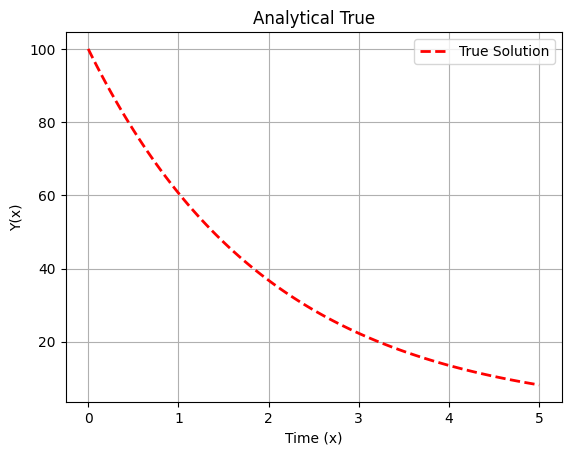

In [15]:
# ✅ Plotting Analytical Solution of Radioactive Decay

t_test = torch.linspace(0, 5, 100).view(-1, 1)
plt.plot(t_test,
         true_solution(t_test),
         linestyle="dashed",
         linewidth=2,
         label="True Solution",
         color="red"
)

plt.xlabel("Time (x)")
plt.ylabel("Y(x)")
plt.legend()
plt.title("Analytical True")
plt.grid()
plt.show()

In [17]:
# ✅ Defining the Architecture of the Physics-Informed Neural Network (PINN)

class PINNS(nn.Module):
  def __init__(self,n_features=1):
    super().__init__()
    self.net=nn.Sequential(
        nn.Linear(n_features,20), nn.Tanh(),
        nn.Linear(20,20), nn.Tanh(),
        nn.Linear(20,1)
    )

  def forward(self,X):
      return self.net(X)

In [19]:
model=PINNS()

In [20]:
summary(model)

Layer (type:depth-idx)                   Param #
PINNS                                    --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       40
│    └─Tanh: 2-2                         --
│    └─Linear: 2-3                       420
│    └─Tanh: 2-4                         --
│    └─Linear: 2-5                       21
Total params: 481
Trainable params: 481
Non-trainable params: 0

In [21]:
def loss(model,x):
      x = x.clone().detach().requires_grad_(True)
      y=model(x)
      dy_dx=torch.autograd.grad(y,x,torch.ones_like(x),create_graph=True)[0]
      eqaution_loss=torch.mean((dy_dx + lambda_decay * y) ** 2)
      x0 = torch.tensor([[0.0]])
      y_pred=model(x0)
      initial_loss=(y0-y_pred)**2
      total_loss= eqaution_loss+initial_loss
      return total_loss

In [22]:
optimizer = optim.Adam(model.parameters(), lr=0.01)


Epoch 1/5000, Loss: 9895.6103515625
Epoch 1001/5000, Loss: 2.8181705474853516
Epoch 2001/5000, Loss: 0.0017721394542604685
Epoch 3001/5000, Loss: 0.0005640190793201327
Epoch 4001/5000, Loss: 0.00024506135378032923


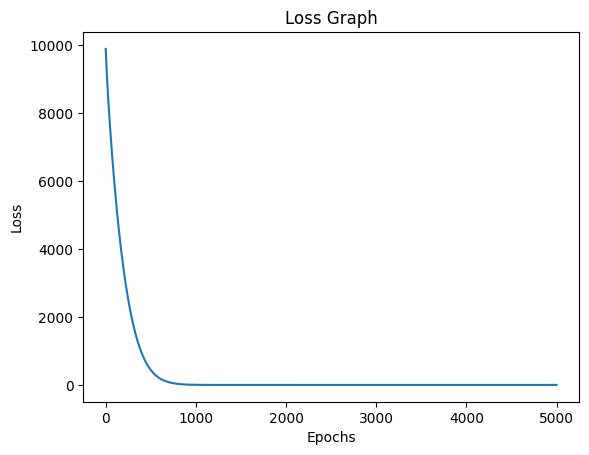

In [23]:
t_train=torch.linspace(0,5,100).view(-1,1)
epochs=5000

loss_history=[]
for epoch in range(epochs):
       optimizer.zero_grad()
       loss_=loss(model,t_train)
       loss_.backward()
       loss_history.append(loss_.item())
       if epoch%1000==0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss(model,t_train).item()}')
       optimizer.step()

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.show()

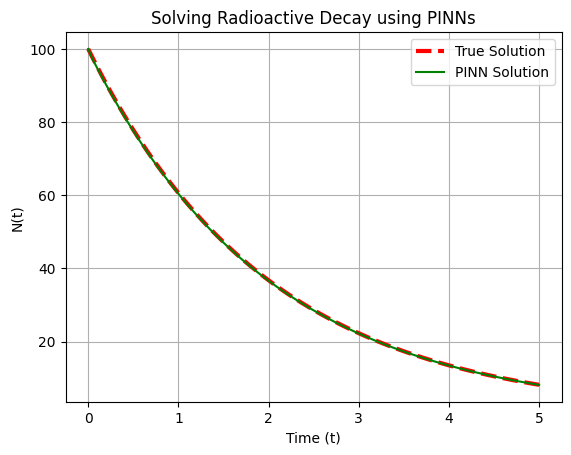

In [24]:
t_test = torch.linspace(0, 5, 100).view(-1, 1)
N_pred = model(t_test).detach().numpy()

plt.plot(t_test, true_solution(t_test), linestyle="dashed", linewidth=3, label="True Solution", color="red")
plt.plot(t_test, N_pred, label="PINN Solution", color="green")
plt.xlabel("Time (t)")
plt.ylabel("N(t)")
plt.legend()
plt.title("Solving Radioactive Decay using PINNs")
plt.grid()
plt.show()